<a href="https://colab.research.google.com/github/data-enthusiast-shubhs/AlmaBetter_Telecom_Churn_Analysis_EDA_Python/blob/main/Capstone_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - ***TELECOM CHURN ANALYSIS***



# **1. Business understanding**

Telecom companies often struggle with customer churn, which refers to the number of customers who leave the company over a given period. In this project, we aimed predict future churning possibilities and to identify the factors that contribute to customer churn.


**Problem Statement**










The provided churn datasets from Telecom contain cleaned customer activity data (features) along with a churn label indicating whether a customer has canceled their subscription. The goal is to explore and analyze these two datasets to identify the key factors driving customer churn and to propose actionable recommendations to improve customer retention. Also to predict future churning possibilities.

 **Business Objective**

*   Identifying the key cause of the customer churn
*   Provide steps to retain the valuable customer
*  Predecting future churning

 **DS Objective**

*   Customer churn prediction
*   Shap Analysis to detect causes of customer churn + providing solutiuons

# **2. Data Understanding**


### Import Libraries

In [10]:
# Import Libraries
import ast
import joblib  # Required for saving and loading models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import xgboost as xgb

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             ConfusionMatrixDisplay, f1_score, precision_score,
                             recall_score, roc_auc_score, roc_curve)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Ensure inline plotting
%matplotlib inline

### Dataset Loading

In [ ]:
df_20 = pd.read_csv("/content/churn-bigml-20.csv")
df_80 = pd.read_csv("/content/churn-bigml-80.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
telecom_df = pd.concat([df_80, df_20], ignore_index=True)#concat just to understand the overall dataset
telecom_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


### Dataset First View

In [ ]:
# Dataset First Look
telecom_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
telecom_df.shape

### Dataset Information

In [ ]:
# Dataset Info
telecom_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
telecom_df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
telecom_df.isnull().sum()

=> The given dataset is from telecom industry. This dataset consists of 3333 rows and 20 columns of customer activity data as Area code, plan details, call details along with churn labels specifying whether the customer cancelled the subscription. There is no missing and duplicate values in the dataset.

## ***2.2 Understanding Our Variables***

In [ ]:
# Dataset Columns
telecom_df.columns

In [ ]:
# Dataset Describe
telecom_df.describe()

### Variables Description

* **State                :**All 51 states

* **Account Length       :** How long account has been active

* **Area Code            :** Code Number of Area

* **lntl Plan            :** International plan activated ( yes, no )

* **VMail Plan           :** Voice Mail plan activated ( yes ,no )

* **VMail Message        :** No.of voice mail messages

* **Day Mins             :** Total day minutes used

* **Day calls**         : Total day calls made

* **Day Charge**         : Total day charge

* **Eve Mins**          : Total evening minutes

* **Eve Calls**          : Total evening calls

* **Eve Charge**         : Total evening charge

* **Night Mins**         : Total night minutes

* **Night Calls**        : Total night calls

* **Night Charge**      : Total night charge

* **Intl Mins**         : Total International minutes used

* **Intl Calls**         : Total International calls made

* **Intl Charge**        : Total International charge

* **CustServ calls**    : Number of customer service calls made

* **Churn**             : Customer churn (Target Variable True=1, False=0)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in telecom_df.columns:
  print("No. of unique values in ",i,"is", telecom_df[i].nunique())

## 2.3 ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
print("No. of customers Churning :",telecom_df[telecom_df['Churn']==True].Churn.count()) # Total No of Customers Churning

# Variable Assigning to churned data
churn_df = telecom_df[telecom_df['Churn']==True]

# Total No of Unique Area Code
print("No of Unique Area Code :", telecom_df['Area code'].nunique())

# Customers On which Internaltion plan is activated
print("No of customer with international plan activated :", telecom_df[telecom_df['International plan']=='Yes']['International plan'].count())

# Customers On which Voice mail plan is activated
print("No of customer with Voice mail plan activated :", telecom_df[telecom_df['Voice mail plan']=='Yes']['Voice mail plan'].count())

churn_df

In [ ]:
# % of total customers churning
print("Total no. of customers :", telecom_df.Churn.count())
perc_churn = (churn_df.Churn.count()/telecom_df.Churn.count())*100
print(f"Percentage of customer churning : {round(perc_churn,2)}%")

In [ ]:
#Statewise customer churning
state_cust_churn = churn_df.groupby(['State'])['Churn'].value_counts().reset_index(name='Churn_customer')
print(state_cust_churn.sum())
state_cust_churn

In [ ]:
# Account length wise churn data
acc_len_churn = churn_df.groupby(['Account length'])['Churn'].value_counts().reset_index(name='values')
print(acc_len_churn.sum())
acc_len_churn
 #kadech bka mahom abo yani

In [ ]:
# Area code wise Churn Count
Area_code_churn_count = churn_df.groupby(['Area code'])['Churn'].value_counts().reset_index(name='Counts')
Area_code_churn_count
# kadech men wehed churna par area

In [ ]:
#Poor Connectivity by intersection of state by area code
Area_state_churn = churn_df.groupby(['Area code'])['State'].unique().reset_index(name='Unique state')
Area_state_churn

In [ ]:
# Percentage of People with and without Voice mail Plan churning to other networks
vmail_plan_churn = (telecom_df.groupby(['Voice mail plan'])['Churn'].mean()*100).reset_index(name='Churn %')
print(vmail_plan_churn)

# Total number of people churning with vmail plan
churn_vmail_yes = churn_df[churn_df['Voice mail plan']=='Yes']
print(f"No of Customers churning having vmail plan is {churn_vmail_yes['Voice mail plan'].value_counts()[0]}")

# Total number of people churning without vmail plan
churn_vmail_no = churn_df[churn_df['Voice mail plan']=='No']
print(f"No of Customers churning not having vmail plan is {churn_vmail_no['Voice mail plan'].value_counts()[0]}")


In [ ]:
# Percentage of People with number of Voice mail messages churning/not-churning to other networks
vmail_mssg_churn = telecom_df.groupby(['Churn'])['Number vmail messages'].mean().reset_index(name='perc_vmail_mssg')
vmail_mssg_churn


In [ ]:
# Day Data
# Percentage of people churning with the average day mins,calls and charge.
telecom_df.groupby(['Churn'])['Total day minutes'].mean().reset_index(name='perc_day_mins')


In [ ]:
telecom_df.groupby(['Churn'])['Total day calls'].mean().reset_index(name='perc_day_calls')
# bivariée analysist :: tvisualisi tehseb el target en fct men kol var features tchurni en fct mel les colonnes lkol

In [ ]:
telecom_df.groupby(['Churn'])['Total day charge'].mean().reset_index(name='perc_day_charge')

In [ ]:
# Evening Data
# Percentage of people churning with the average Evening mins,calls and charge.
telecom_df.groupby(['Churn'])['Total eve minutes'].mean().reset_index(name='perc_eve_mins')


In [ ]:
telecom_df.groupby(['Churn'])['Total eve calls'].mean().reset_index(name='perc_eve_calls')


In [ ]:
telecom_df.groupby(['Churn'])['Total eve charge'].mean().reset_index(name='perc_eve_charge')

In [ ]:
# Night Data
# Percentage of people churning with the average Night mins,calls and charge.
telecom_df.groupby(['Churn'])['Total night minutes'].mean().reset_index(name='perc_night_mins')


In [ ]:
telecom_df.groupby(['Churn'])['Total night calls'].mean().reset_index(name='perc_night_calls')


In [ ]:
telecom_df.groupby(['Churn'])['Total night charge'].mean().reset_index(name='perc_night_charge')

In [ ]:
# Intl Call Data
# Percentage of people churning with the average international mins,calls and charge.
telecom_df.groupby(['Churn'])['Total intl minutes'].mean().reset_index(name='perc_intl_mins')


In [ ]:
telecom_df.groupby(['Churn'])['Total intl calls'].mean().reset_index(name='perc_intl_calls')


In [ ]:

telecom_df.groupby(['Churn'])['Total intl charge'].mean().reset_index(name='perc_intl_charge')

In [ ]:
# Combining of day,evening and night calls, mins and charges
telecom_df['Total calls'] = telecom_df.loc[:,['Total day calls','Total eve calls', 'Total night calls']].sum(axis=1)
telecom_df['Total mins'] = telecom_df.loc[:,['Total day minutes','Total eve minutes', 'Total night minutes']].sum(axis=1)
telecom_df['Total charge'] = telecom_df.loc[:,['Total day charge','Total eve charge', 'Total night charge']].sum(axis=1)

# mins per call
telecom_df['min_per_call'] = telecom_df['Total mins']/telecom_df['Total calls']

#charge per min
telecom_df['charge_per_min'] = telecom_df['Total charge']/telecom_df['Total mins']

# International mins per call
telecom_df['Intl_min_per_call'] = telecom_df['Total intl minutes']/telecom_df['Total intl calls']

#International charge per min
telecom_df['Intl_charge_per_min'] = telecom_df['Total intl charge']/telecom_df['Total intl minutes']
#multi varieted analysist :: target maha akther men variables :: labed li tchurnet en fct des hajet


In [ ]:
# Customer Service Call data
print("No of unique service calls made :", telecom_df['Customer service calls'].nunique())

# Percentage of churning based on the customer service calls made
(telecom_df.groupby(['Customer service calls'])['Churn'].mean()*100).reset_index(name='Perc_churned')
#kadech men wehed jewah 5rf4f mara service call churna

## ***2.4 Data Vizualization***

#### Univariate Analysis


In [ ]:
# Chart - 1  Dependent Column Value Counts
print(telecom_df.Churn.value_counts())
print(" ")

# Dependent Variable Column Visualization
telecom_df['Churn'].value_counts().plot( kind='pie',figsize=(4,4),
                                        autopct="%1.1f%%",
startangle=50,
shadow=True,
labels=['Not Churn(%)','Churn(%)'],
colors=['green','red'],explode=[0.12,0])
plt.title('Total Percentage of Churn')

# Displaying chart
plt.show()

In [ ]:
# Chart - 2 Visualizing code of histogram plot & boxplot for each columns to know the data distribution , and outliers detections
for col in telecom_df.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
    sns.histplot(telecom_df[col], ax = axes[0],kde = True)
    sns.boxplot(telecom_df[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

#### Bivariate Analysis



In [ ]:
# Chart - 3  State vs. average true churn percentage visualization code

# Vizualizing top 10 churned state
plt.figure(figsize=(10,4))
bar1 = ((telecom_df.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = False).reset_index(name="Average True Churn ").head(10))
plots = sns.barplot(data = bar1, x = 'State', y="Average True Churn ")
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
# Setting limit of the y axis from 0 to 30
plt.ylim(0,30)
plt.show()

NameError: name 'telecom_df' is not defined

<Figure size 1000x400 with 0 Axes>

In [ ]:
# Vizualizing bottom 10 churned state
plt.figure(figsize=(10,4))
bar1 = ((telecom_df.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = True).reset_index(name="Average True Churn ").head(10))
plots = sns.barplot(data = bar1, x = 'State', y="Average True Churn ")
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" State with least churn percentage", fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
# Setting limit of y axis from 0 to 10
plt.ylim(0,10)
plt.show()

In [ ]:
# Chart - 4 One Digit and Two Digit Account Length
import matplotlib.pyplot as plt
import seaborn as sns

# One Digit Account Length
one_length = telecom_df[telecom_df['Account length'] <= 9].loc[:, ['Churn']].value_counts()
print(one_length)
print(" ")

# Two Digit Account Length
two_account = telecom_df[(telecom_df['Account length'] <= 99) & (telecom_df['Account length'] >= 10)].loc[:, ['Churn']].value_counts()
print(two_account)
print(" ")

# Visualizing One Digit and Two Digit Account Length Based on Churn percentage
colors = sns.color_palette('pastel')[0:7]
textprops = {'fontsize': 13}

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plotting One Digit Account Length
axes[0].pie(one_length, labels=['Not Churn(%)', 'Churn(%)'], startangle=90, colors=colors, autopct="%1.1f%%", textprops=textprops)
axes[0].set_title('One Digit Account Length Churn Rate', fontsize=18)

# Plotting Two Digit Account Length
axes[1].pie(two_account, labels=['Not Churn(%)', 'Churn(%)'], startangle=90, colors=colors, autopct="%1.1f%%", textprops=textprops)
axes[1].set_title('Two Digit Account Length Churn Rate', fontsize=18)

plt.tight_layout()
plt.show()


In [ ]:
# Chart - 5 visualization code KADEH MIN WAHED AMEL INTERNATIONAL PLAN

# data for international plan
inter_plan = telecom_df['International plan'].value_counts()
print(inter_plan)
print(" ")

# Visualizing Percentage of customers taken international plan
#color palette selection
colors = sns.color_palette('husl')[0:7]
textprops = {'fontsize':13}

plt.figure(figsize=(10,4))
# plotting pie chart
plt.pie(inter_plan, labels=['No','Yes'],startangle=90 , colors=colors, autopct="%1.1f%%", textprops = textprops)
plt.title('International Plan', fontsize=18)
plt.show()

In [ ]:
# Assigning values for furthur charts
i1 = telecom_df['International plan'].unique()
i2 = telecom_df.groupby('International plan')['Churn'].mean()*100
i3 = telecom_df.groupby(['International plan'])['Total intl charge'].mean()
i4 = telecom_df.groupby(["Churn"])['Total intl minutes'].mean()

In [ ]:
# Visualizing code for people churning percentage having international plan  KADEH MIN WAHED AMEL INTERNATIONAL PLAN chur
plt.figure(figsize=(6,4))
plots = sns.barplot(x=i1,y=i2)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" Percentage of customer churn on basis of International plan", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
plt.ylim(0,45)
plt.show()

In [ ]:
# Visualizing code for average calling charge of customers having international plan
plt.figure(figsize=(6,4))
plots = sns.barplot(x=i1,y=i3)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" Average charges on the basis of International plan", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel('Charges', fontsize = 15)
plt.ylim(0,3.5)
plt.show()

In [ ]:
# Visualizing code for average minutes talked by customers having international plan
plt.figure(figsize=(6,4))
plots = sns.barplot(x=i1,y=i4)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" Average International minutes on basis of international plan", fontsize = 20)
plt.xlabel('International Plan', fontsize = 15)
plt.ylabel('Minutes', fontsize = 15)
plt.ylim(0,12)
plt.show()

In [ ]:
# Chart - 6 visualization code

# data for voice mail plan
voice = telecom_df['Voice mail plan'].value_counts()

# vizualizing code for customers percentage having voice mail plan

#color palette selection
palette_color = sns.color_palette('pastel')
textprops = {'fontsize':13}

# plotting chart of voice mail
plt.figure(figsize=(9,4))
plt.pie(voice, labels=['No','Yes'],startangle=90 , colors=palette_color, autopct="%1.1f%%",textprops = textprops)
plt.title('Distribution of customers having voice mail plan', fontsize=18)
plt.show()

In [ ]:
# Vizualizing code for customers churning while having voice mail plan

cc1=list(['no','yes'])
cc2=telecom_df.groupby('Voice mail plan')['Churn'].mean()*100

plt.figure(figsize=(6,4))
plots = sns.barplot(x=cc1,y=cc2)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" Percentage of customer churn on basis of voice mail plan", fontsize = 20)
plt.xlabel('Voice mail plan', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
plt.show()

=> **VOICE MAIL**

2411 dont have a voice mail plan

922 have a voice mail plan

Among those who dont have a voice mail 16.7 % people churn.

Whereas among those who have a voice mail plan only 8.7 % people churn.


***Customers  with the Voice Mail Plan tend to churn less frequently***

Yes, voice mail plan might be considered partially.

In [ ]:
# Chart - 7 visualization code
# Visualizing code for Area Code wise average churn percentage
a1= telecom_df['Area code'].unique()
b1= telecom_df.groupby('Area code')['Churn'].mean()*100

plt.figure(figsize=(6,4))
plots = sns.barplot(x=a1, y=b1)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Area Code vs Churn Percantage',fontsize=20)
plt.xlabel('Area code', fontsize = 15)
plt.ylabel('Churn percentage (%)', fontsize = 15)
plt.ylim(0,17)
plt.show()

=> All Area Code have around 14% Churn rate. So, Area Code doesn't matter.

In [ ]:
# Chart - 8 visualization code
# Average of total day calls, total day minutes & total day charge of churn
cn_dcalls = pd.DataFrame(telecom_df.groupby(["Churn"])['Total day calls'].mean())
print(cn_dcalls)
print('')
cn_dm = pd.DataFrame(telecom_df.groupby(["Churn"])['Total day minutes'].mean())
print(cn_dm)
print('')
cn_dc = pd.DataFrame(telecom_df.groupby(["Churn"])['Total day charge'].mean())
print(cn_dc)

In [ ]:
# Vizualizing Total day minutes vs total day charge
plt.figure(figsize=(7,5))
sns.scatterplot(data=telecom_df, x="Total day minutes", y="Total day charge", hue="Churn")
plt.title('Total Day Minutes, vs Total Day Charge', fontsize=18)
plt.xlabel('Total day minutes',fontsize = 13)
plt.ylabel('Total day charges',fontsize = 13)
plt.show()

In [ ]:
# Average of total eve calls, total eve minutes & total evening charge of churn
cn_ecalls = pd.DataFrame(telecom_df.groupby(["Churn"])['Total eve calls'].mean())
print(cn_ecalls)
print(" ")
cn_em = pd.DataFrame(telecom_df.groupby(["Churn"])['Total eve minutes'].mean())
print(cn_em)
print(" ")
cn_ec = pd.DataFrame(telecom_df.groupby(["Churn"])['Total eve charge'].mean())
print(cn_ec)

In [ ]:
# Vizualizing total evening minutes vs total evening charge
plt.figure(figsize=(7,4))
sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=telecom_df)
plt.title('Total evening minutes vs Total evening charge', fontsize=18)
plt.xlabel('Total eve minutes',fontsize = 13)
plt.ylabel('Total eve charges',fontsize = 13)
plt.show()

In [ ]:
# Average of total night calls, total night minutes & total night charge of churn
cn_ncalls = pd.DataFrame(telecom_df.groupby(["Churn"])['Total night calls'].mean())
print(cn_ncalls)
print(" ")
cn_nm = pd.DataFrame(telecom_df.groupby(["Churn"])['Total night minutes'].mean())
print(cn_nm)
print(" ")
cn_nc = pd.DataFrame(telecom_df.groupby(["Churn"])['Total night charge'].mean())
print(cn_nc)

In [ ]:
# Vizualizing Total night minutes vs total night charge
plt.figure(figsize=(7,4))
sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=telecom_df)
plt.title('Total night minutes vs Total night charge', fontsize=18)
plt.xlabel('Total night minutes',fontsize = 13)
plt.ylabel('Total night charges',fontsize = 13)
plt.show()

In [ ]:
# Table of average calls of total day, eve & night on basis of churn
cn_calls = pd.merge(pd.merge(cn_dcalls,cn_ecalls, on = 'Churn'),cn_ncalls,on = 'Churn').round(2).T
cn_calls

In [ ]:
# Table of average minutes of total day, eve & night on basis of churn
cn_minutes = pd.merge(pd.merge(cn_dm,cn_em, on = 'Churn'),cn_nm,on = 'Churn').round(2).T
cn_minutes

In [ ]:
# Table of average charges of total day, eve & night on basis of churn
cn_charges = pd.merge(pd.merge(cn_dc,cn_ec, on = 'Churn'),cn_nc,on = 'Churn').round(2).T
cn_charges

=> **OVERALL CALLS**

Churn customers speak more minutes that non-churn customers at day,evening and night. Hence they pay more charge that non-churn customers.

We can retain churn customers if we include master plan.
In master plan if a customer is talking more minutes then we can charge a little less amount from him or he can get discount or additional few free minutes to talk.

This will make customers who are going to churn happy and they will not leave the company.

In [ ]:
# Chart - 9 visualization code
# data for customer service calls
service = pd.DataFrame(telecom_df.groupby('Customer service calls')['Churn'].mean()*100)

# Visualizing churn rate per customer service calls
plt.figure(figsize=(10,4))
plots = sns.barplot(x=service.index, y=service['Churn'])
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Churn rate per service call", fontsize = 20)
plt.xlabel('No of cust service call', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
plt.show()

=> **CUSTOMER SERVICE CALL**

The service calls of customers varies from 0 to 9 .

Those customers who make more service calls they have a high probability of leaving.

As we can see from graph , customers with more than 5, their churning rate is more.

Hence customers who make more than 5 service calls, their queries should be solved immediately and they should be given better service so that they dont leave the company.

***Customers with four or more customer service calls churn more than four times as often as do the other customers***

Customer service is an essential factor for every business. So definitely good customer service will have a positive impact to the business. We have to look after the customer calls and customer query report resolution duration. Need to optimize the time period. If one type of issue is coming from more than 5 customers, root cause analysis should be done on that same issue and should be resolved for everyone.
Need to reduce the calls for each customer and he should be satisfied in a single call only. The customer service agents should be given great offer or recognition over great performance of customer issue resolution.

#### Multivariate Analysis

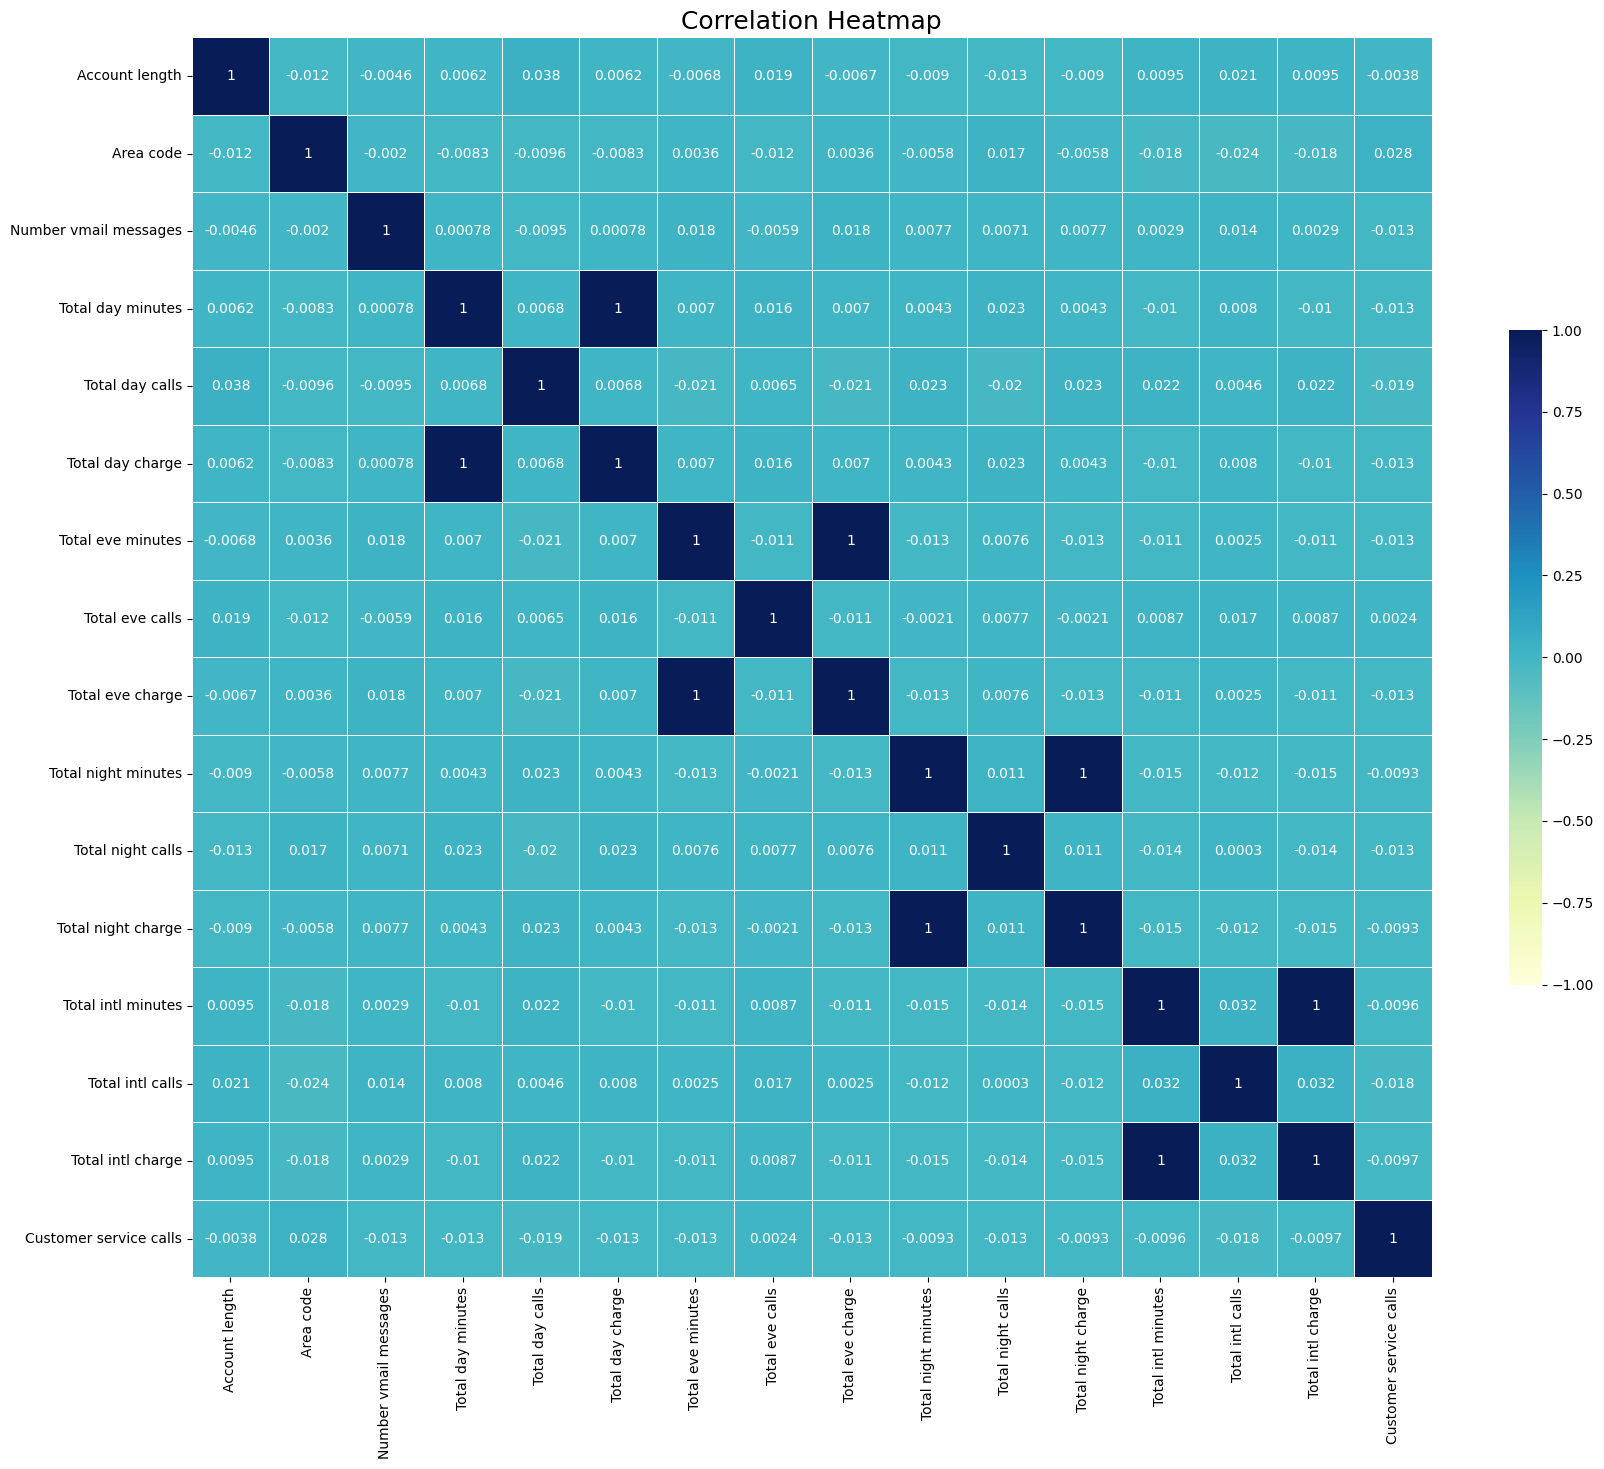

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_telecom_df = telecom_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_telecom_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 17))

# Draw the heatmap with no mask
sns.heatmap(
    corr,
    cmap="YlGnBu",
    vmin=-1,
    vmax=1,
    annot=True,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

plt.title("Correlation Heatmap", fontsize=18)
plt.show()


=> From the above correlation heatmap, we can see total day charge & total day minute, total evening charge & total evening minute, total night charge & total night minute are positiveliy highly correlated with a value of 1.

Customer service call is positively correlated only with area code and negative correlated with rest variables.

Rest all correlation can be depicted from the above chart.

# **3. Data Preparation**

**Handeling Outliers**

In [ ]:
def handle_outliers_all_columns(df, method='remove', multiplier=1.5, max_iter=3):
    df_cleaned = df.copy()  # Avoid modifying the original DataFrame
    numerical_cols = df_cleaned.select_dtypes(include=['number']).columns

    for _ in range(max_iter):  # Apply the process iteratively
        for col in numerical_cols:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR

            if method == 'remove':
                df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
            elif method == 'replace':
                median = df_cleaned[col].median()
                df_cleaned[col] = np.where(
                    (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound),
                    median,
                    df_cleaned[col]
                )
            elif method == 'cap':
                df_cleaned[col] = np.clip(df_cleaned[col], lower_bound, upper_bound)
            else:
                raise ValueError("Method must be 'remove', 'replace', or 'cap'.")

        # Check for convergence: Break if no more outliers
        if all(
            (df_cleaned[col] >= (df_cleaned[col].quantile(0.25) - multiplier * IQR)).all() and
            (df_cleaned[col] <= (df_cleaned[col].quantile(0.75) + multiplier * IQR)).all()
            for col in numerical_cols
        ):
            break

    return df_cleaned

Handeling and Rechecking for outliers

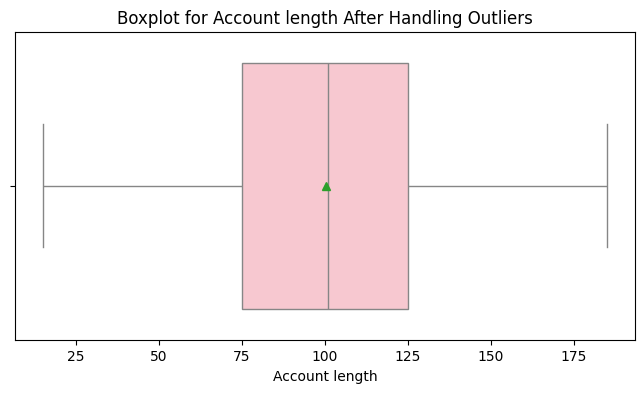

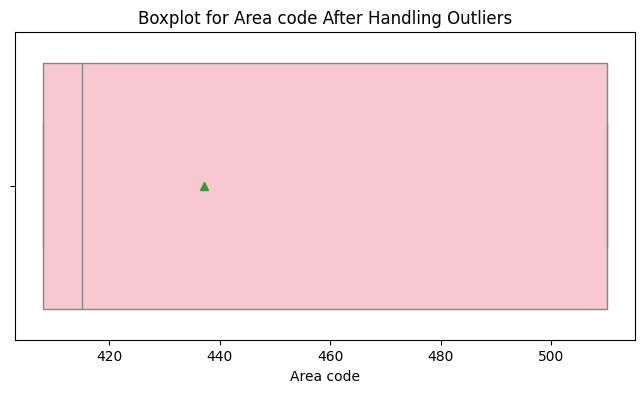

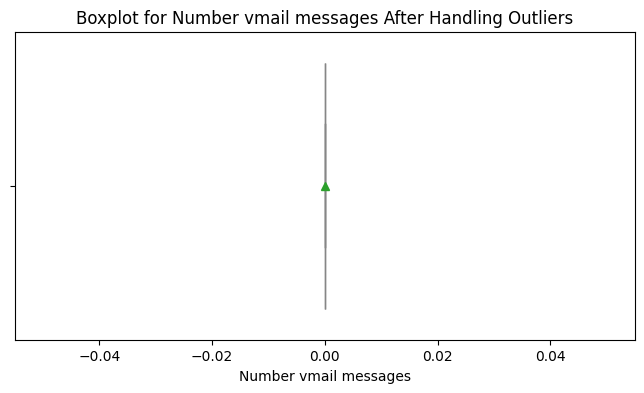

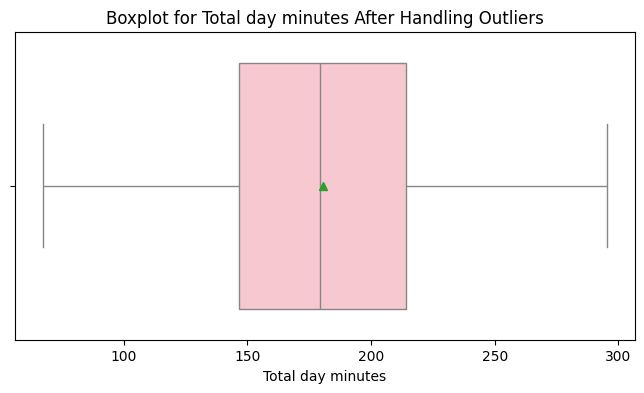

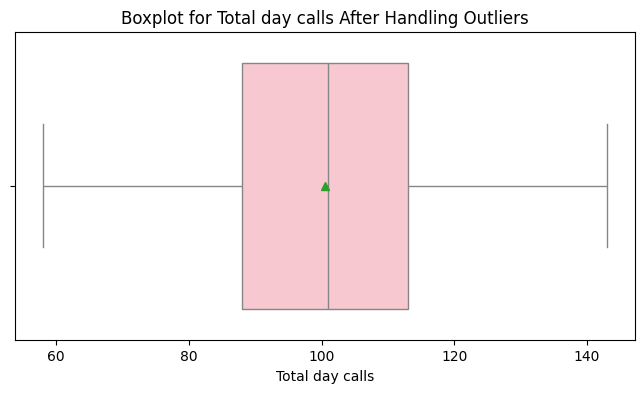

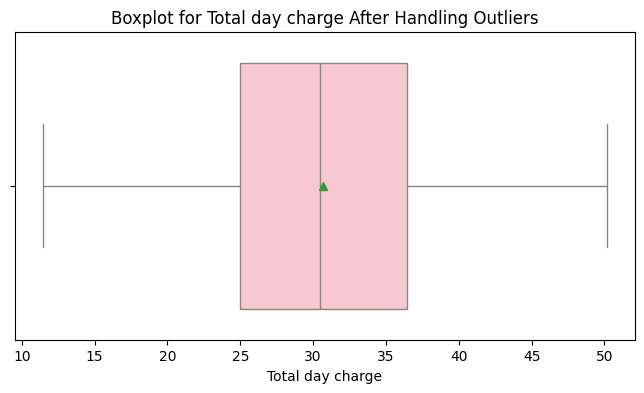

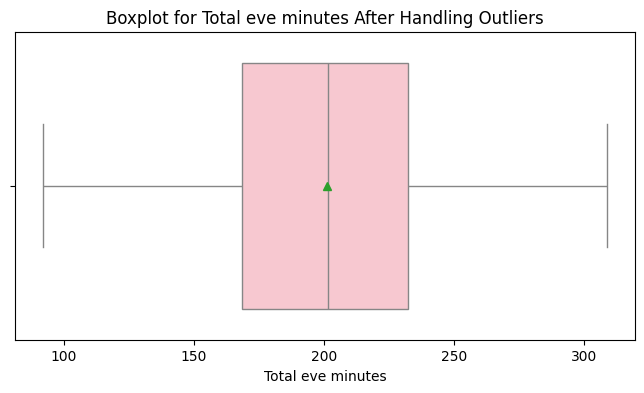

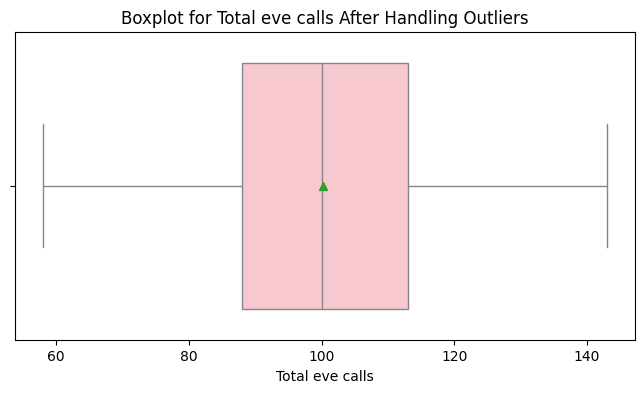

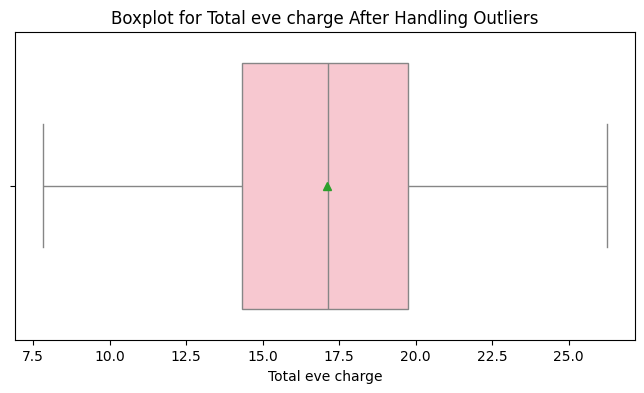

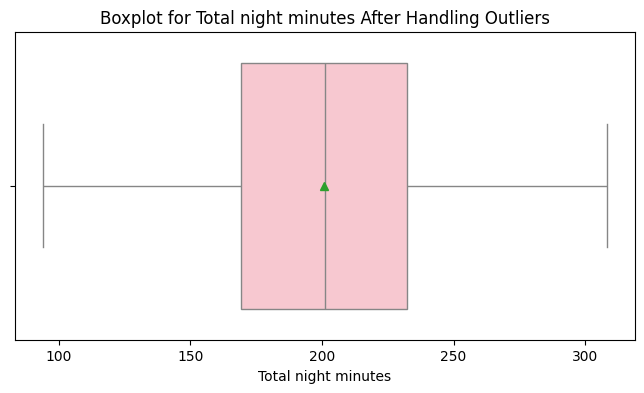

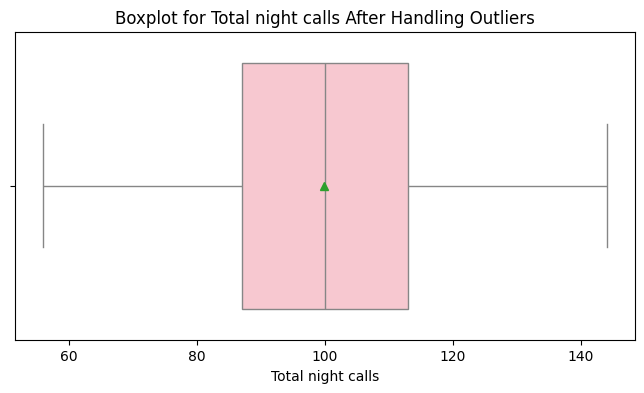

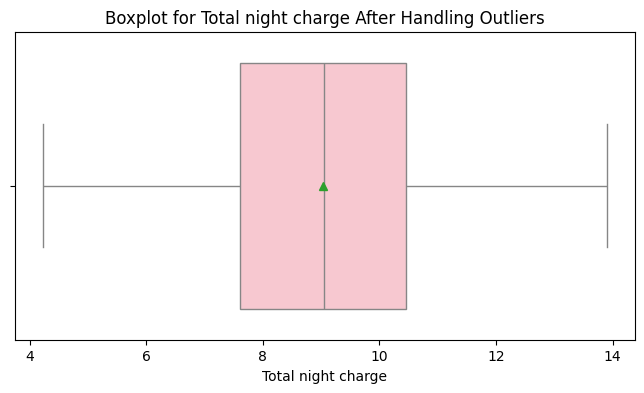

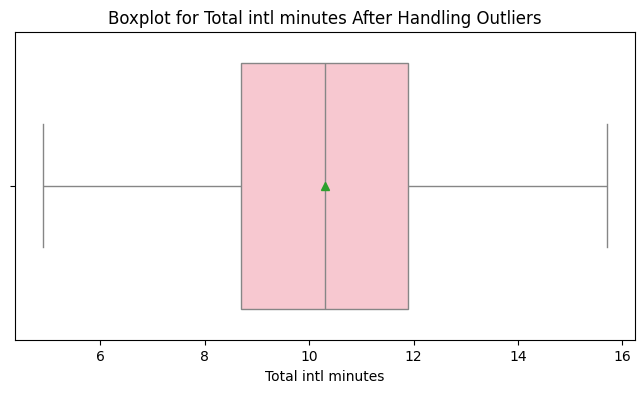

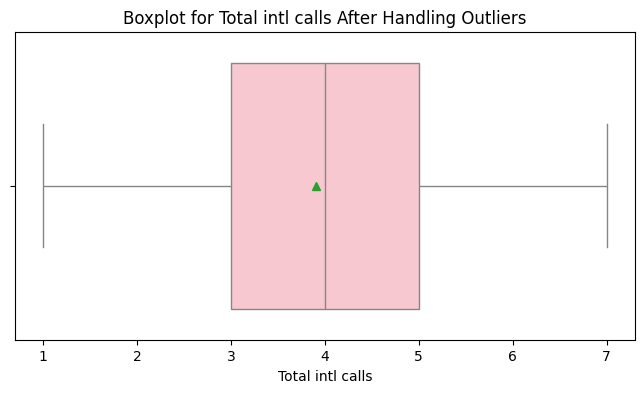

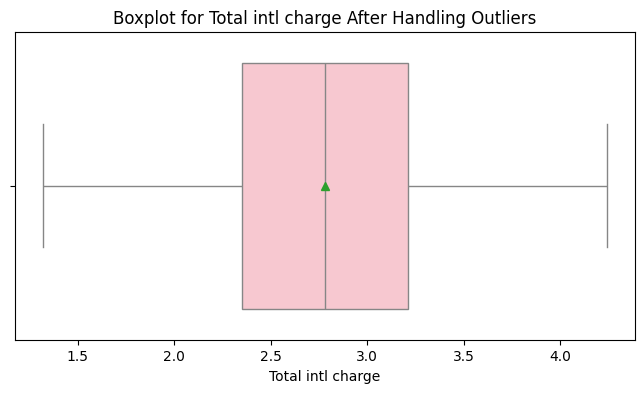

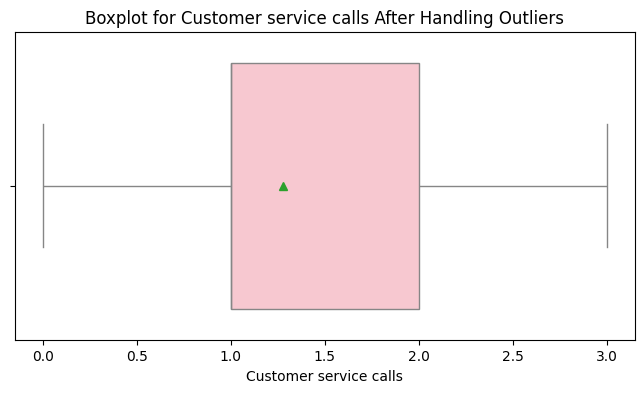

In [ ]:
# Clean the DataFrame with stricter bounds
telecom_df_cleaned = handle_outliers_all_columns(telecom_df, method='replace', multiplier=1.2, max_iter=5)

# Visualize the results with boxplots
import seaborn as sns
import matplotlib.pyplot as plt

for col in telecom_df_cleaned.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=telecom_df_cleaned[col], orient='h', showmeans=True, color='pink')
    plt.title(f"Boxplot for {col} After Handling Outliers")
    plt.xlabel(col)
    plt.show()


In [ ]:
# Check mean values only for numeric columns
numeric_columns = telecom_df.select_dtypes(include=['number']).columns

# Mean values before handling outliers
print("Mean values before handling outliers:")
print(telecom_df[numeric_columns].mean())

# Handle outliers (use your outlier handling function)
telecom_df_cleaned = handle_outliers_all_columns(telecom_df, method='replace', multiplier=1.5)

# Mean values after handling outliers
print("\nMean values after handling outliers:")
print(telecom_df_cleaned[numeric_columns].mean())


Mean values before handling outliers:
Account length            101.064806
Area code                 437.182418
Number vmail messages       8.099010
Total day minutes         179.775098
Total day calls           100.435644
Total day charge           30.562307
Total eve minutes         200.980348
Total eve calls           100.114311
Total eve charge           17.083540
Total night minutes       200.872037
Total night calls         100.107711
Total night charge          9.039325
Total intl minutes         10.237294
Total intl calls            4.479448
Total intl charge           2.764581
Customer service calls      1.562856
dtype: float64

Mean values after handling outliers:
Account length            100.433543
Area code                 437.182418
Number vmail messages       8.083708
Total day minutes         179.941854
Total day calls           100.670567
Total day charge           30.590666
Total eve minutes         201.178578
Total eve calls           100.115212
Total eve charge     

**Encoding**

In [ ]:
import pandas as pd

def encode_states(df):
    # Define the custom order of states
    custom_state_order = [
        'CA', 'TX', 'NY', 'FL', 'IL', 'PA', 'OH', 'MI', 'GA', 'NC', 'NJ', 'VA',
        'WA', 'AZ', 'MA', 'TN', 'IN', 'MO', 'MD', 'WI', 'CO', 'MN', 'SC', 'AL',
        'LA', 'KY', 'OR', 'OK', 'CT', 'UT', 'IA', 'NV', 'AR', 'MS', 'KS', 'NM',
        'NE', 'WV', 'ID', 'HI', 'ME', 'NH', 'RI', 'MT', 'DE', 'SD', 'ND', 'AK',
        'VT', 'WY'
    ]

    # Create an ordered categorical type with the defined order
    custom_state_category = pd.CategoricalDtype(categories=custom_state_order, ordered=True)

    # Apply the ordinal encoding to the 'State' column
    df['State'] = df['State'].astype(custom_state_category)
    df['State_encoded'] = df['State'].cat.codes

    return df


In [ ]:
telecom_df_encoded = encode_states(telecom_df_cleaned)

In [ ]:
#Verif
telecom_df_encoded

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_encoded
0,KS,128.0,415.0,No,Yes,0.0,265.1,110.0,45.07,197.4,...,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False,34
1,OH,107.0,415.0,No,Yes,0.0,161.6,123.0,27.47,195.5,...,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False,6
2,NJ,137.0,415.0,No,No,0.0,243.4,114.0,41.38,121.2,...,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False,10
3,OH,84.0,408.0,Yes,No,0.0,179.4,71.0,30.50,201.4,...,17.12,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False,6
4,OK,75.0,415.0,Yes,No,0.0,166.7,113.0,28.34,148.3,...,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114.0,415.0,No,Yes,0.0,137.1,88.0,23.31,155.7,...,13.23,247.6,94.0,11.14,11.5,7.0,3.11,2.0,False,19
3329,AL,106.0,408.0,No,Yes,0.0,83.6,131.0,14.21,203.9,...,17.33,229.5,73.0,10.33,8.1,3.0,2.19,1.0,False,23
3330,VT,60.0,415.0,No,No,0.0,193.9,118.0,32.96,201.4,...,17.12,210.1,134.0,9.45,13.2,4.0,3.56,3.0,False,48
3331,WV,159.0,415.0,No,No,0.0,169.8,114.0,28.87,197.7,...,16.80,193.7,82.0,8.72,11.6,4.0,3.13,1.0,False,37


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(data, columns):
    encoding_mapping = {}
    encoded_data = data.copy()

    for col in columns:
        # Label encoding
        le = LabelEncoder()
        encoded_data[col + '_encoded'] = le.fit_transform(data[col])
        encoding_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))

    return encoded_data, encoding_mapping


In [ ]:

# Assuming df_20_encoded and df_80_encoded are defined
telecom_df_encoded, encoding_mapping= label_encode_columns(telecom_df_encoded, ['International plan', 'Voice mail plan', 'Churn'])

In [ ]:
telecom_df_encoded

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_encoded,International plan_encoded,Voice mail plan_encoded,Churn_encoded
0,KS,128.0,415.0,No,Yes,0.0,265.1,110.0,45.07,197.4,...,11.01,10.0,3.0,2.70,1.0,False,34,0,1,0
1,OH,107.0,415.0,No,Yes,0.0,161.6,123.0,27.47,195.5,...,11.45,13.7,3.0,3.70,1.0,False,6,0,1,0
2,NJ,137.0,415.0,No,No,0.0,243.4,114.0,41.38,121.2,...,7.32,12.2,5.0,3.29,0.0,False,10,0,0,0
3,OH,84.0,408.0,Yes,No,0.0,179.4,71.0,30.50,201.4,...,8.86,6.6,7.0,1.78,2.0,False,6,1,0,0
4,OK,75.0,415.0,Yes,No,0.0,166.7,113.0,28.34,148.3,...,8.41,10.1,3.0,2.73,3.0,False,27,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114.0,415.0,No,Yes,0.0,137.1,88.0,23.31,155.7,...,11.14,11.5,7.0,3.11,2.0,False,19,0,1,0
3329,AL,106.0,408.0,No,Yes,0.0,83.6,131.0,14.21,203.9,...,10.33,8.1,3.0,2.19,1.0,False,23,0,1,0
3330,VT,60.0,415.0,No,No,0.0,193.9,118.0,32.96,201.4,...,9.45,13.2,4.0,3.56,3.0,False,48,0,0,0
3331,WV,159.0,415.0,No,No,0.0,169.8,114.0,28.87,197.7,...,8.72,11.6,4.0,3.13,1.0,False,37,0,0,0


**Readjusting numerical Values**

In [ ]:
#data conver
telecom_df_encoded['Account length'] =telecom_df_encoded['Account length'].astype(int)
telecom_df_encoded['Area code'] = telecom_df_encoded['Area code'].astype(int)
telecom_df_encoded['Total day calls'] = telecom_df_encoded['Total day calls'].astype(int)
telecom_df_encoded['Number vmail messages'] = telecom_df_encoded['Number vmail messages'].astype(int)
telecom_df_encoded['Total intl calls'] = telecom_df_encoded['Total intl calls'].astype(int)
telecom_df_encoded['Customer service calls'] =telecom_df_encoded['Customer service calls'].astype(int)

Vérification

In [ ]:
telecom_df_encoded

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_encoded,International plan_encoded,Voice mail plan_encoded,Churn_encoded
0,KS,128,415,No,Yes,0,265.1,110,45.07,197.4,...,11.01,10.0,3,2.70,1,False,34,0,1,0
1,OH,107,415,No,Yes,0,161.6,123,27.47,195.5,...,11.45,13.7,3,3.70,1,False,6,0,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,7.32,12.2,5,3.29,0,False,10,0,0,0
3,OH,84,408,Yes,No,0,179.4,71,30.50,201.4,...,8.86,6.6,7,1.78,2,False,6,1,0,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,8.41,10.1,3,2.73,3,False,27,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114,415,No,Yes,0,137.1,88,23.31,155.7,...,11.14,11.5,7,3.11,2,False,19,0,1,0
3329,AL,106,408,No,Yes,0,83.6,131,14.21,203.9,...,10.33,8.1,3,2.19,1,False,23,0,1,0
3330,VT,60,415,No,No,0,193.9,118,32.96,201.4,...,9.45,13.2,4,3.56,3,False,48,0,0,0
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,...,8.72,11.6,4,3.13,1,False,37,0,0,0


In [ ]:
# Drop specified columns from the encoded dataframes
telecom_df_encoded.drop(['State', 'International plan', 'Voice mail plan', 'Churn'], axis=1, inplace=True)

In [ ]:
#Save the new data to csv file
telecom_df_encoded.to_csv('telecom_df_encoded.csv', index=False)

# **4. Modeling**

**Features selection** ( paper 1)

In [4]:
telecom_df_encoded=pd.read_csv('/content/telecom_df_encoded.csv')

In [5]:
# Features and target
X = telecom_df_encoded.drop('Churn_encoded', axis=1)
y = telecom_df_encoded['Churn_encoded']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Importance:
                       Feature  Importance
5             Total day charge    0.139352
14           Total intl charge    0.110484
8             Total eve charge    0.089379
13            Total intl calls    0.076771
17  International plan_encoded    0.075942
3            Total day minutes    0.059484
4              Total day calls    0.056995
9          Total night minutes    0.054382
11          Total night charge    0.050723
10           Total night calls    0.047967
7              Total eve calls    0.041287
18     Voice mail plan_encoded    0.036379
2        Number vmail messages    0.034481
6            Total eve minutes    0.032915
0               Account length    0.030595
16               State_encoded    0.021471
15      Customer service calls    0.020536
12          Total intl minutes    0.011366
1                    Area code    0.009489


<ipython-input-6-18c89ec5642c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


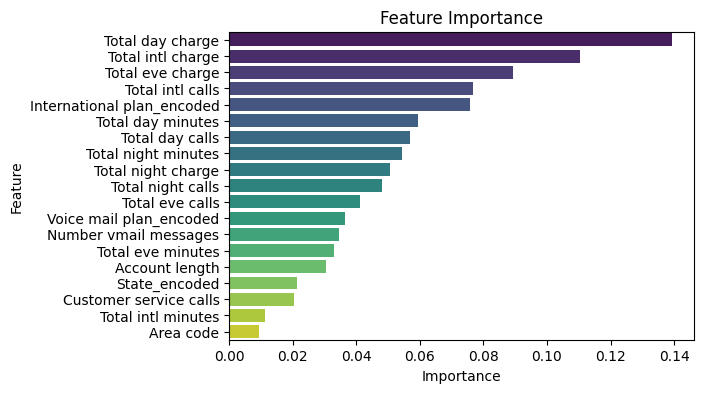

In [6]:
# Train Decision Tree model according to paper 1
rf_model = DecisionTreeClassifier(random_state=42)  # Adjust `n_estimators` and other parameters as needed
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()


Feature Importance:
                       Feature  Importance
5             Total day charge    0.123032
3            Total day minutes    0.118578
17  International plan_encoded    0.078594
8             Total eve charge    0.067665
6            Total eve minutes    0.066178
13            Total intl calls    0.055935
12          Total intl minutes    0.052785
14           Total intl charge    0.050712
11          Total night charge    0.049896
9          Total night minutes    0.048551
4              Total day calls    0.046050
10           Total night calls    0.045324
7              Total eve calls    0.042358
16               State_encoded    0.041117
0               Account length    0.039852
2        Number vmail messages    0.025845
18     Voice mail plan_encoded    0.017633
15      Customer service calls    0.017455
1                    Area code    0.012441


<ipython-input-7-5a1af1c2a45d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


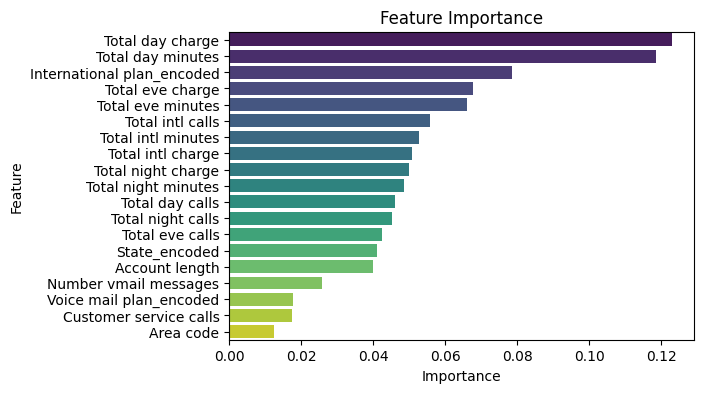

In [7]:
# Train rf model according to paper 1
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF Data for df_encoded:\n", vif_data)

VIF Data for df_encoded:
                        feature           VIF
0               Account length  8.736524e+00
1                    Area code  6.810992e+01
2        Number vmail messages           NaN
3            Total day minutes  8.694784e+03
4              Total day calls  2.978621e+01
5             Total day charge  8.707078e+03
6            Total eve minutes  3.823541e+07
7              Total eve calls  2.950249e+01
8             Total eve charge  3.823678e+07
9          Total night minutes  1.226368e+04
10           Total night calls  2.862546e+01
11          Total night charge  1.225348e+04
12          Total intl minutes  1.023922e+06
13            Total intl calls  7.358586e+00
14           Total intl charge  1.024194e+06
15      Customer service calls  2.860288e+00
16               State_encoded  3.755776e+00
17  International plan_encoded  1.123910e+00
18     Voice mail plan_encoded  1.384498e+00


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


=> the highest VIF values are:

Total day minutes,Total day charge ,Total eve minutes,Total eve charge

In [ ]:
# Columns to eliminate(multicol +importance<0.01)
columns_to_drop = [
    'Total day minutes',
    'Total eve minutes',
    'Total night minutes',
    'Total intl minutes',
    'Area code',
]

telecom_df_encoded = telecom_df_encoded.drop(columns=columns_to_drop, axis=1)

# Features and target
X = telecom_df_encoded.drop('Churn_encoded', axis=1)
y = telecom_df_encoded['Churn_encoded']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,Account length,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,State_encoded,International plan_encoded,Voice mail plan_encoded
0,128,25,110,45.07,99.0,16.78,91.0,11.01,3,2.70,1,34,0,1
1,107,26,123,27.47,103.0,16.62,103.0,11.45,3,3.70,1,6,0,1
2,137,0,114,41.38,110.0,10.30,104.0,7.32,5,3.29,0,10,0,0
3,84,0,71,50.90,88.0,17.12,89.0,8.86,7,1.78,2,6,1,0
4,75,0,113,28.34,122.0,12.61,121.0,8.41,3,2.73,3,27,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,114,26,88,23.31,125.0,13.23,94.0,11.14,7,3.11,2,19,0,1
3329,106,29,131,14.21,131.0,17.33,73.0,10.33,3,2.19,1,23,0,1
3330,60,0,118,32.96,110.0,7.23,134.0,9.45,8,3.56,3,48,0,0
3331,159,0,114,28.87,105.0,16.80,82.0,8.72,4,3.13,1,37,0,0


**Training**

**Data resampling**(paper 1)

SMOTE generates synthetic samples to address class imbalance in your dataset, ensuring that the minority class is better represented.

ENN removes noisy and borderline samples from the dataset, improving the quality of the resampled data.

In [14]:
  def prepare_data(X_train, y_train):
        from imblearn.over_sampling import SMOTE
        from imblearn.under_sampling import EditedNearestNeighbours

        smote = SMOTE(sampling_strategy='minority', random_state=123)
        enn = EditedNearestNeighbours()
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
        X_resampled, y_resampled = enn.fit_resample(X_resampled, y_resampled)

        if visualize_resampling:
            fig, axes = plt.subplots(1, 2, figsize=(14, 5))
            sns.countplot(x=y_train, ax=axes[0])
            axes[0].set_title("Class Distribution Before Resampling")
            sns.countplot(x=y_resampled, ax=axes[1])
            axes[1].set_title("Class Distribution After Resampling")
            plt.show()

        return X_resampled, y_resampled


In [20]:
def train_classification_models(X, y, resample=False, visualize_resampling=False):
    def prepare_data(X_train, y_train):
        from imblearn.over_sampling import SMOTE
        from imblearn.under_sampling import EditedNearestNeighbours

        smote = SMOTE(sampling_strategy='minority', random_state=123)
        enn = EditedNearestNeighbours()
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
        X_resampled, y_resampled = enn.fit_resample(X_resampled, y_resampled)

        if visualize_resampling:
            fig, axes = plt.subplots(1, 2, figsize=(14, 5))
            sns.countplot(x=y_train, ax=axes[0])
            axes[0].set_title("Class Distribution Before Resampling")
            sns.countplot(x=y_resampled, ax=axes[1])
            axes[1].set_title("Class Distribution After Resampling")
            plt.show()

        return X_resampled, y_resampled

    # Split dataset into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    if resample:
        X_train, y_train = prepare_data(X_train, y_train)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define models and optimized parameter grids
    models = {
    'SVC': (SVC(), {
        'C': [0.1, 1, 10],  # Focus on a smaller, impactful range
        'kernel': ['linear', 'rbf'],  # Avoid 'poly' to reduce complexity
        'gamma': ['scale']
    }),
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100],  # Reduce the range
        'max_depth': [10, 20],  # Omit 'None' for faster computation
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }),
    'Logistic Regression': (LogisticRegression(max_iter=500), [  # Balanced regularization search
        {'penalty': ['l2'], 'C': [0.1, 1, 10], 'solver': ['liblinear']},
        {'penalty': ['l1'], 'C': [0.1, 1], 'solver': ['liblinear']}
    ]),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [50, 100],  # Smaller range
        'learning_rate': [0.05, 0.1],  # Focused on common values
        'max_depth': [3, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }),
    'Neural Network': (MLPClassifier(max_iter=300, random_state=42), {
        'hidden_layer_sizes': [(50,), (100,)],  # Limit to fewer configurations
        'activation': ['relu'],  # Focus on default activation
        'solver': ['adam'],  # Avoid 'sgd' for time efficiency
        'alpha': [0.0001, 0.001],
        'learning_rate': ['constant']  # Avoid 'adaptive' for simplicity
    })
}


    best_models = {}

    # Train and optimize each model using GridSearchCV
    for name, (model, params) in models.items():
        print(f"Training {name}...")
        grid = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train_scaled, y_train)
        best_models[name] = grid.best_estimator_
        print(f"Best parameters for {name}: {grid.best_params_}")
        print(f"Best cross-validated accuracy for {name}: {grid.best_score_:.4f}\n")

    # Evaluate models on the test set
    for name, model in best_models.items():
        print(f"Evaluating {name}...")
        y_pred = model.predict(X_test_scaled)
        print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred):.4f}")
        print(classification_report(y_test, y_pred))

        ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
        plt.title(f"Confusion Matrix for {name}")
        plt.show()

    # Save models
    joblib.dump(best_models, 'best_models.joblib')

    return best_models


Training SVC...
Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validated accuracy for SVC: 0.8911

Training Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validated accuracy for Random Forest: 0.9181

Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validated accuracy for Logistic Regression: 0.8598

Training Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validated accuracy for Gradient Boosting: 0.9228

Training Neural Network...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for Neural Network: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validated accuracy for Neural Network: 0.8980

Evaluating SVC...
Accuracy for SVC: 0.8940
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       857
           1       0.91      0.29      0.44       143

    accuracy                           0.89      1000
   macro avg       0.90      0.64      0.69      1000
weighted avg       0.90      0.89      0.87      1000



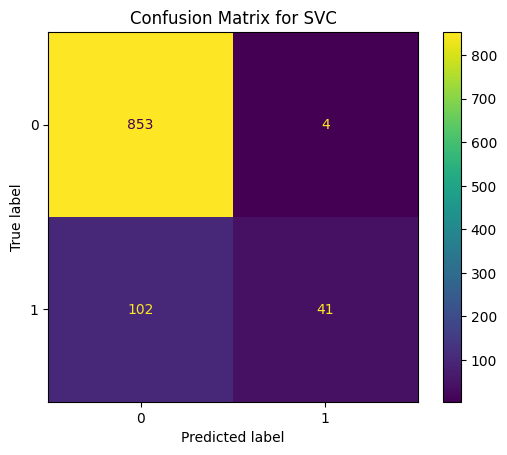

Evaluating Random Forest...
Accuracy for Random Forest: 0.9190
              precision    recall  f1-score   support

           0       0.92      1.00      0.95       857
           1       0.97      0.45      0.61       143

    accuracy                           0.92      1000
   macro avg       0.94      0.72      0.78      1000
weighted avg       0.92      0.92      0.91      1000



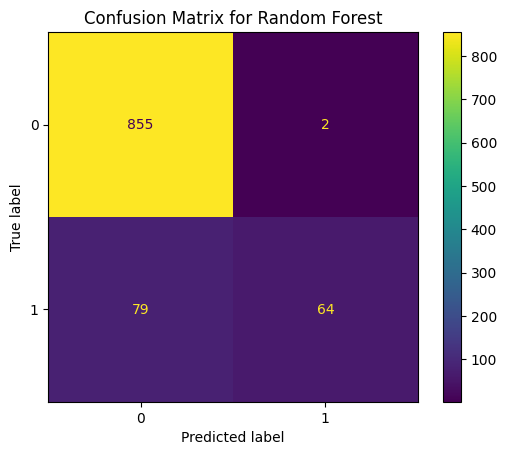

Evaluating Logistic Regression...
Accuracy for Logistic Regression: 0.8650
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       857
           1       0.68      0.10      0.18       143

    accuracy                           0.86      1000
   macro avg       0.78      0.55      0.55      1000
weighted avg       0.84      0.86      0.82      1000



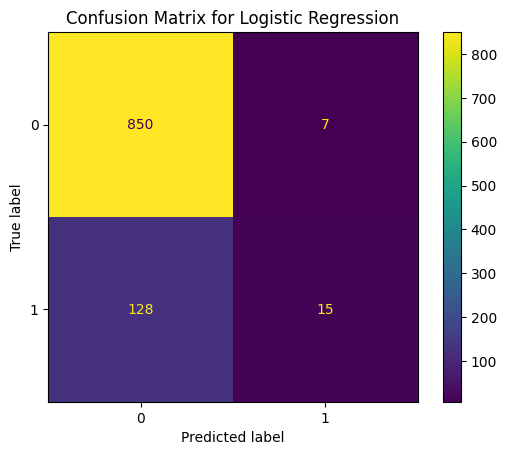

Evaluating Gradient Boosting...
Accuracy for Gradient Boosting: 0.9210
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       857
           1       0.93      0.48      0.64       143

    accuracy                           0.92      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.92      0.92      0.91      1000



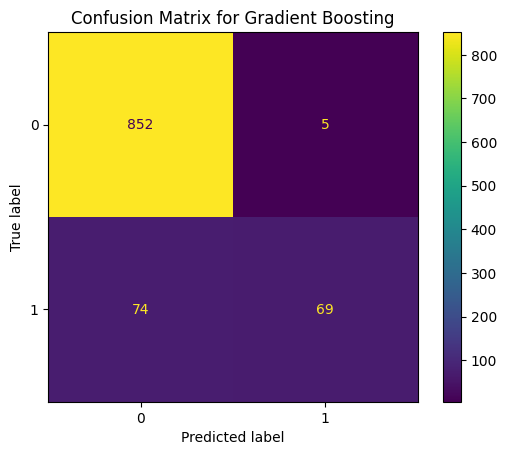

Evaluating Neural Network...
Accuracy for Neural Network: 0.9060
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       857
           1       0.79      0.47      0.59       143

    accuracy                           0.91      1000
   macro avg       0.85      0.72      0.77      1000
weighted avg       0.90      0.91      0.90      1000



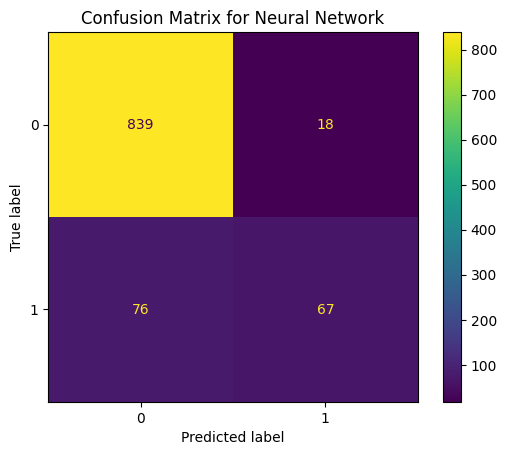

In [16]:
from sklearn.neural_network import MLPClassifier

best_models_original = train_classification_models(X, y, resample=False, visualize_resampling=False)

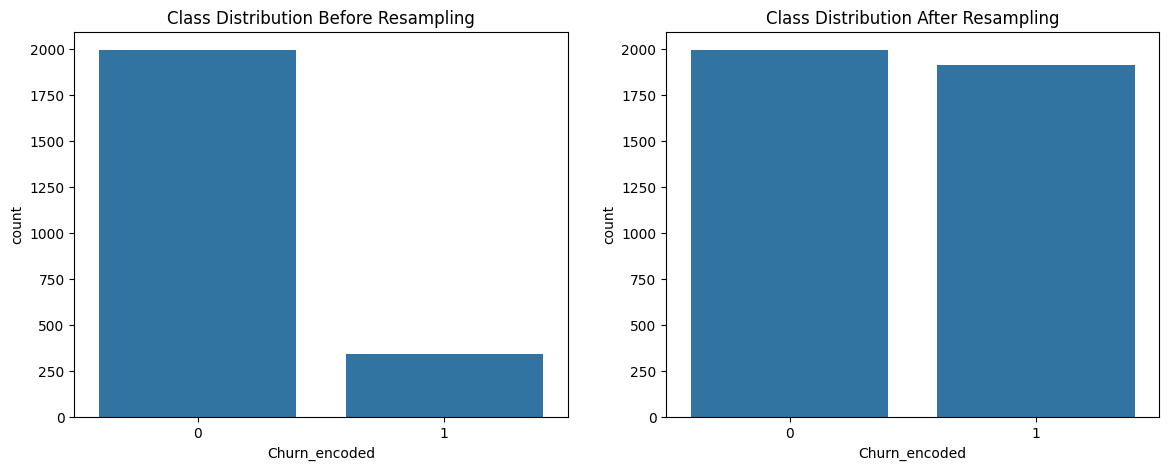

Training SVC...
Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validated accuracy for SVC: 0.9295

Training Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validated accuracy for Random Forest: 0.9405

Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validated accuracy for Logistic Regression: 0.7022

Training Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validated accuracy for Gradient Boosting: 0.9047

Training Neural Network...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for Neural Network: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validated accuracy for Neural Network: 0.9116

Evaluating SVC...
Accuracy for SVC: 0.8340
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       857
           1       0.41      0.38      0.39       143

    accuracy                           0.83      1000
   macro avg       0.65      0.64      0.65      1000
weighted avg       0.83      0.83      0.83      1000



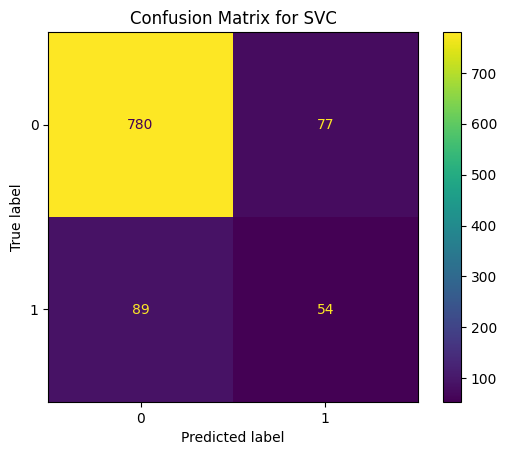

Evaluating Random Forest...
Accuracy for Random Forest: 0.8700
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       857
           1       0.58      0.34      0.43       143

    accuracy                           0.87      1000
   macro avg       0.74      0.65      0.68      1000
weighted avg       0.85      0.87      0.86      1000



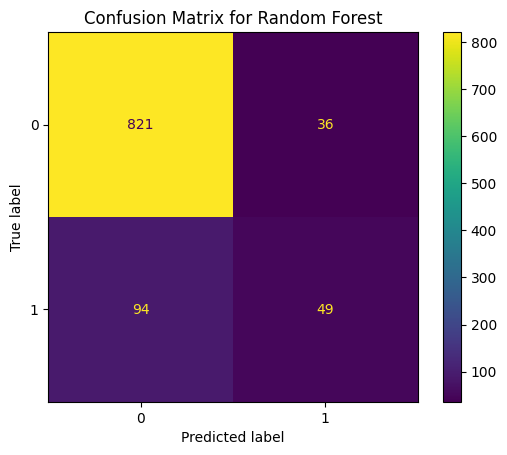

Evaluating Logistic Regression...
Accuracy for Logistic Regression: 0.7100
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       857
           1       0.27      0.59      0.37       143

    accuracy                           0.71      1000
   macro avg       0.59      0.66      0.59      1000
weighted avg       0.82      0.71      0.75      1000



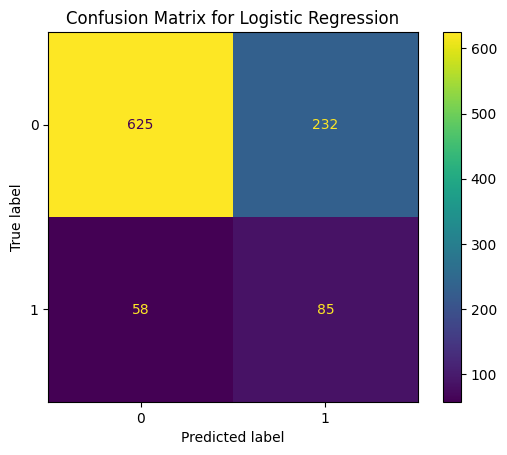

Evaluating Gradient Boosting...
Accuracy for Gradient Boosting: 0.8730
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       857
           1       0.56      0.55      0.55       143

    accuracy                           0.87      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.87      0.87      0.87      1000



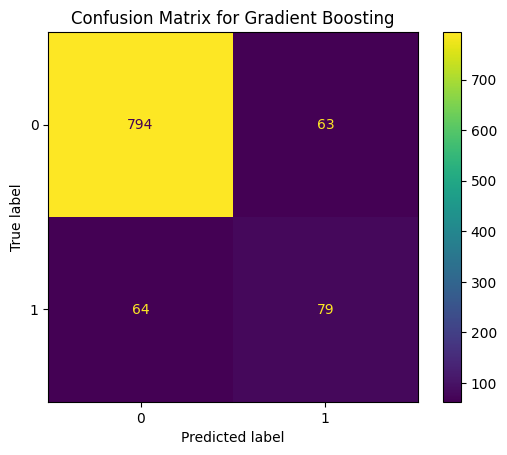

Evaluating Neural Network...
Accuracy for Neural Network: 0.8480
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       857
           1       0.47      0.48      0.47       143

    accuracy                           0.85      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.85      0.85      0.85      1000



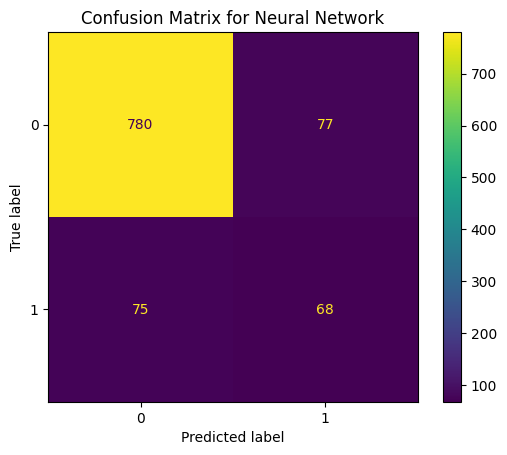

In [21]:
best_models = train_classification_models(X, y, resample=True, visualize_resampling=True)

# **5. Evaluation**

Evaluation on Original Test Data
Evaluating SVC (Before Resampling)...
Evaluating Random Forest (Before Resampling)...
Evaluating Logistic Regression (Before Resampling)...
Evaluating Gradient Boosting (Before Resampling)...
Evaluating Neural Network (Before Resampling)...

Resampling Data Using SMOTE + ENN...


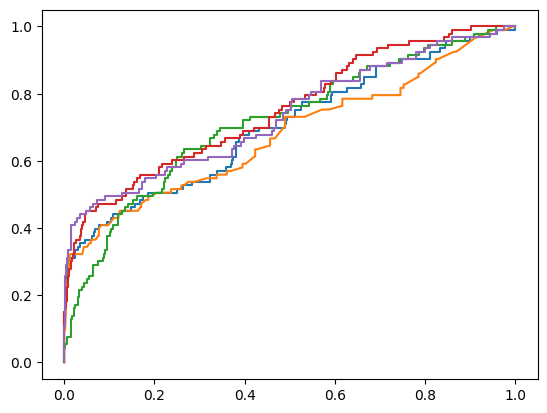

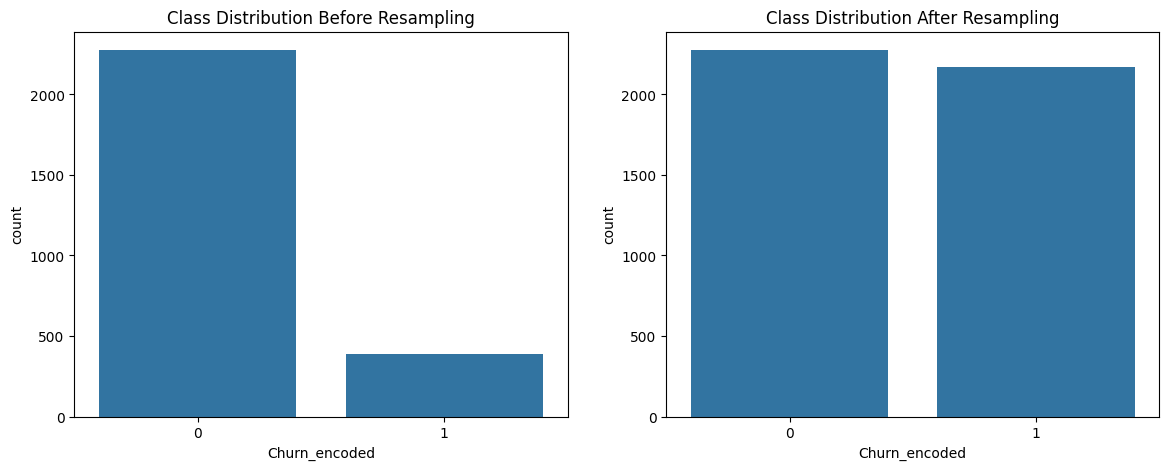

Evaluation on Resampled Test Data
Evaluating SVC (After Resampling)...
Evaluating Random Forest (After Resampling)...
Evaluating Logistic Regression (After Resampling)...
Evaluating Gradient Boosting (After Resampling)...
Evaluating Neural Network (After Resampling)...
Evaluating SVC (Before Resampling)...
Evaluating Random Forest (Before Resampling)...
Evaluating Logistic Regression (Before Resampling)...
Evaluating Gradient Boosting (Before Resampling)...
Evaluating Neural Network (Before Resampling)...
Evaluating SVC (After Resampling)...
Evaluating Random Forest (After Resampling)...
Evaluating Logistic Regression (After Resampling)...
Evaluating Gradient Boosting (After Resampling)...
Evaluating Neural Network (After Resampling)...


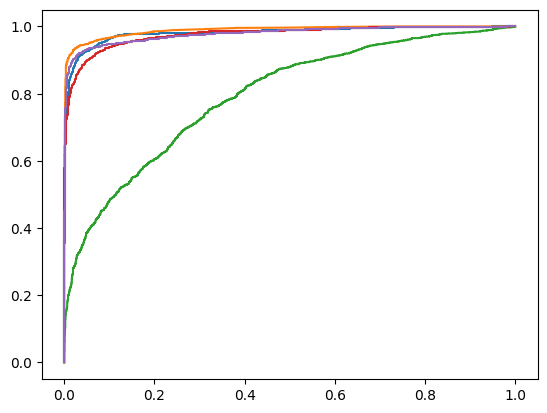

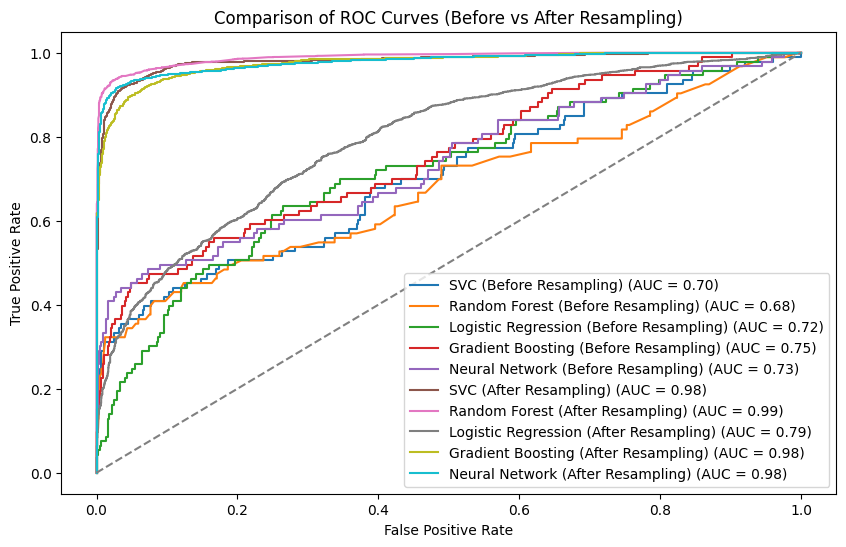


Final Evaluation Results:
                                     Model  Accuracy  Precision    Recall  \
0                  SVC (Before Resampling)  0.893553   0.805556  0.311828   
1        Random Forest (Before Resampling)  0.895052   0.810811  0.322581   
2  Logistic Regression (Before Resampling)  0.811094   0.358974  0.451613   
3    Gradient Boosting (Before Resampling)  0.880060   0.594203  0.440860   
4       Neural Network (Before Resampling)  0.893553   0.689655  0.430108   
5                   SVC (After Resampling)  0.939455   0.950190  0.924319   
6         Random Forest (After Resampling)  0.955661   0.974928  0.933087   
7   Logistic Regression (After Resampling)  0.694351   0.635784  0.874019   
8     Gradient Boosting (After Resampling)  0.923475   0.922330  0.920628   
9        Neural Network (After Resampling)  0.944632   0.966036  0.918782   

   F1-Score   ROC-AUC  
0  0.449612  0.703402  
1  0.461538  0.677597  
2  0.400000  0.716871  
3  0.506173  0.751115  
4  0.

In [22]:
import joblib
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, classification_report
)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Prepare Data Function
def prepare_data(X_train, y_train, visualize_resampling=True):
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import EditedNearestNeighbours

    smote = SMOTE(sampling_strategy='minority', random_state=123)
    enn = EditedNearestNeighbours()
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    X_resampled, y_resampled = enn.fit_resample(X_resampled, y_resampled)

    if visualize_resampling:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        sns.countplot(x=y_train, ax=axes[0])
        axes[0].set_title("Class Distribution Before Resampling")
        sns.countplot(x=y_resampled, ax=axes[1])
        axes[1].set_title("Class Distribution After Resampling")
        plt.show()

    return X_resampled, y_resampled

# Function to evaluate models on test data
def evaluate_models_on_test(models, X_test, y_test, title_suffix=""):
    results = []

    # Scale the test data
    scaler = StandardScaler()
    X_test_scaled = scaler.fit_transform(X_test)

    for name, model in models.items():
        print(f"Evaluating {name} ({title_suffix})...")

        # Predict probabilities
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test_scaled)[:, 1]
        elif hasattr(model, "decision_function"):
            y_proba = model.decision_function(X_test_scaled)
            y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # Normalize
        else:
            y_proba = model.predict(X_test_scaled)

        # Find optimal threshold
        optimal_threshold = find_optimal_threshold(y_test, y_proba)
        y_pred = (y_proba >= optimal_threshold).astype(int)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        roc_auc = roc_auc_score(y_test, y_proba)

        results.append({
            'Model': name + f" ({title_suffix})",
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc
        })

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} ({title_suffix}) (AUC = {roc_auc:.2f})")

    return pd.DataFrame(results)

# Function to find optimal threshold
def find_optimal_threshold(y_true, y_proba):
    thresholds = np.linspace(0, 1, 101)
    f1_scores = [f1_score(y_true, (y_proba >= t).astype(int)) for t in thresholds]
    return thresholds[np.argmax(f1_scores)]

# Load models
best_models = joblib.load('best_models.joblib')

# Load your train and test data
# X_train, y_train = ...  # Training data
# X_test, y_test = ...    # Testing data

# ---------------- BEFORE RESAMPLING ----------------
print("Evaluation on Original Test Data")
before_results = evaluate_models_on_test(best_models, X_test, y_test, title_suffix="Before Resampling")

# ---------------- AFTER RESAMPLING ----------------
print("\nResampling Data Using SMOTE + ENN...")
X_resampled, y_resampled = prepare_data(X_train, y_train)

print("Evaluation on Resampled Test Data")
after_results = evaluate_models_on_test(best_models, X_resampled, y_resampled, title_suffix="After Resampling")

# ---------------- COMBINE RESULTS ----------------
all_results = pd.concat([before_results, after_results], ignore_index=True)

# ---------------- PLOT COMPARISON ROC CURVES ----------------
plt.figure(figsize=(10, 6))
evaluate_models_on_test(best_models, X_test, y_test, title_suffix="Before Resampling")
evaluate_models_on_test(best_models, X_resampled, y_resampled, title_suffix="After Resampling")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparison of ROC Curves (Before vs After Resampling)")
plt.legend(loc="lower right")
plt.show()

# Display Results Table
print("\nFinal Evaluation Results:")
print(all_results)


EXPLAINER MODEL (paper 3)

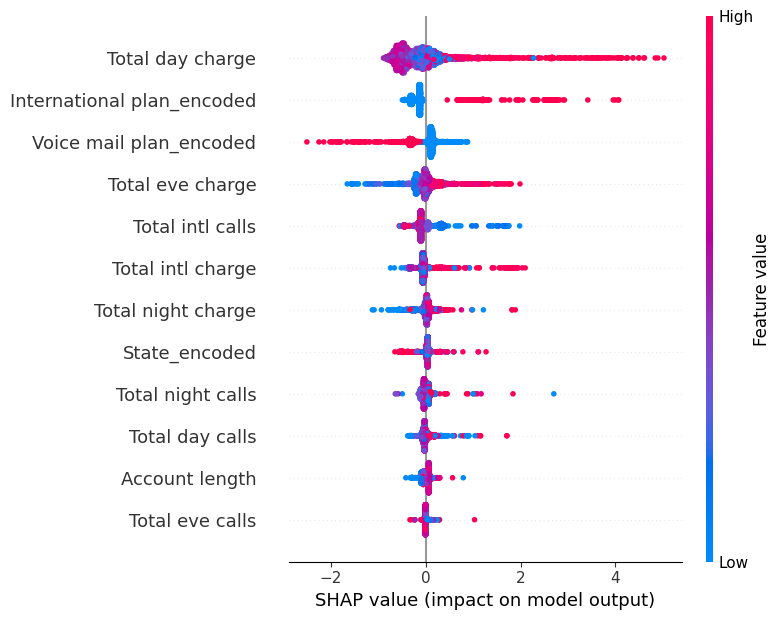

In [ ]:
#shap with rf model doen't give a coherent graph so we opted for gb model

explainer = shap.TreeExplainer(gb_model)
shap_values = explainer.shap_values(X_train)

# Plot summary
shap.summary_plot(shap_values, X_train)


(Paper 3+ shap analysis)

=> **The SHAP analysis for the churn prediction model in telecommunications highlights that** Total day charge, International plan_encoded, and Voice mail plan_encoded are key factors influencing customer churn. Customers with higher daily charges and certain plan types are more likely to churn.

**Proposed Solutions:**

**Tailored Pricing Plans:** Offer tiered pricing to reduce churn among customers with high daily charges.

**Enhanced Communication:** Focus on customers with specific plan types (e.g., international plans) to emphasize loyalty benefits and retention.

**Segmented Marketing:** Target high-risk customers with personalized promotions, such as discounts or service bundles.

**SHAP insights help telecom operators predict churn more accurately and implement targeted retention strategies.**


# **6. Deployement**

In [ ]:
import joblib
X_resampled, y_resampled= prepare_data(X_train, y_train)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)
joblib.dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']